# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

arquivo = 'sinasc_RO_2019.csv'
df = pd.read_csv(arquivo)

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

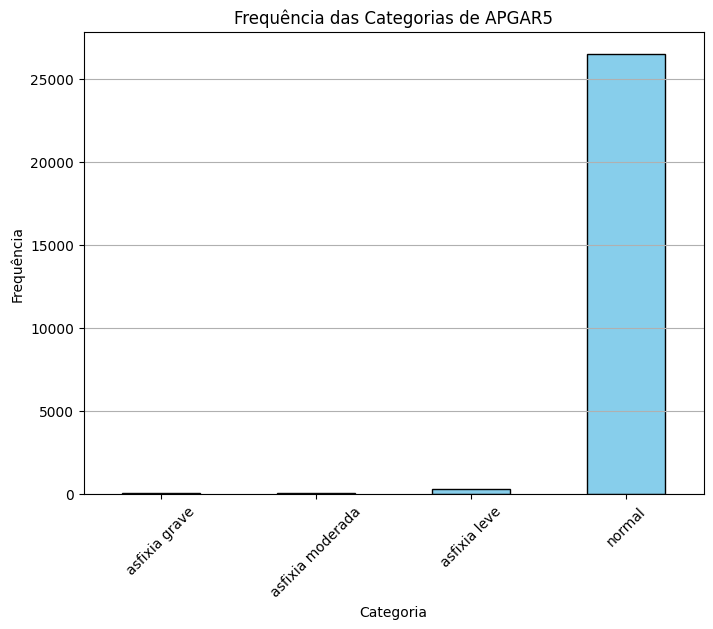

In [2]:
#Categorizando a variável APGAR5
bins = [0, 3, 5, 7, 10]
labels = ['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal']

df['APGAR5_CATEGORIA'] = pd.cut(df['APGAR5'], bins=bins, labels=labels, right=True)

#Contando as frequências de cada categoria
category_counts = df['APGAR5_CATEGORIA'].value_counts().reindex(labels)

#Criando um gráfico de barras com as categorias de APGAR5
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequência das Categorias de APGAR5')
plt.xlabel('Categoria')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

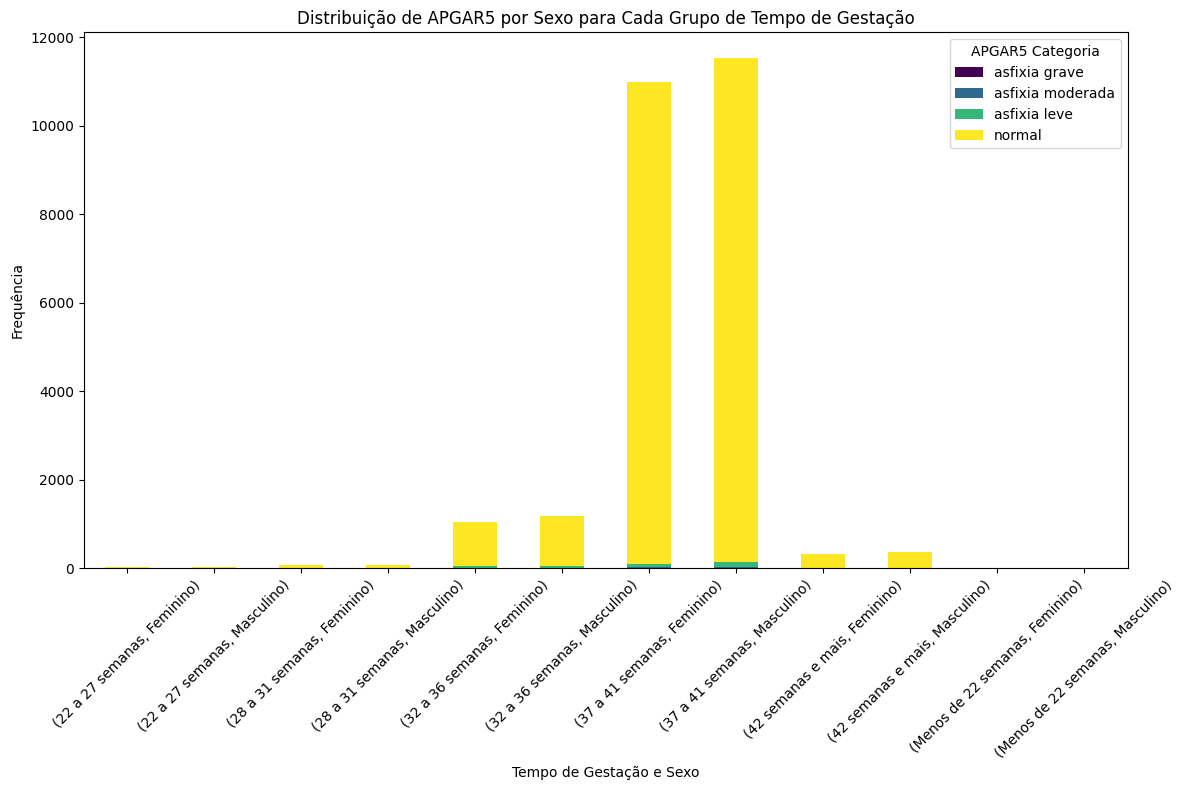

In [8]:
# Criando uma tabela de contingência para contar a frequência de APGAR5 por SEXO e GESTACAO
contingency_table = pd.crosstab([df['GESTACAO'], df['SEXO']], df['APGAR5_CATEGORIA'])

# Criando o gráfico de barras empilhadas
contingency_table.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 8))
plt.title('Distribuição de APGAR5 por Sexo para Cada Grupo de Tempo de Gestação')
plt.xlabel('Tempo de Gestação e Sexo')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.legend(title='APGAR5 Categoria')
plt.tight_layout()
plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [7]:
#Criando a tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas
tabela_cruzada = pd.crosstab(df['GESTACAO'], df['APGAR5_CATEGORIA'])

print(tabela_cruzada)

APGAR5_CATEGORIA     asfixia grave  asfixia moderada  asfixia leve  normal
GESTACAO                                                                  
22 a 27 semanas                 14                 1            12      51
28 a 31 semanas                  3                12            18     129
32 a 36 semanas                  6                19            73    2134
37 a 41 semanas                 28                28           196   22266
42 semanas e mais                0                 1             6     690
Menos de 22 semanas              1                 0             1       4


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [6]:
#Calculando os percentuais de linha (distribuição de APGAR5 para cada classe de GESTACAO)
percentual_linha = tabela_cruzada.div(tabela_cruzada.sum(axis=1), axis=0) * 100

# Exibindo a tabela cruzada com percentuais de linha
print(percentual_linha)

APGAR5_CATEGORIA     asfixia grave  asfixia moderada  asfixia leve     normal
GESTACAO                                                                     
22 a 27 semanas          17.948718          1.282051     15.384615  65.384615
28 a 31 semanas           1.851852          7.407407     11.111111  79.629630
32 a 36 semanas           0.268817          0.851254      3.270609  95.609319
37 a 41 semanas           0.124345          0.124345      0.870415  98.880895
42 semanas e mais         0.000000          0.143472      0.860832  98.995696
Menos de 22 semanas      16.666667          0.000000     16.666667  66.666667


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

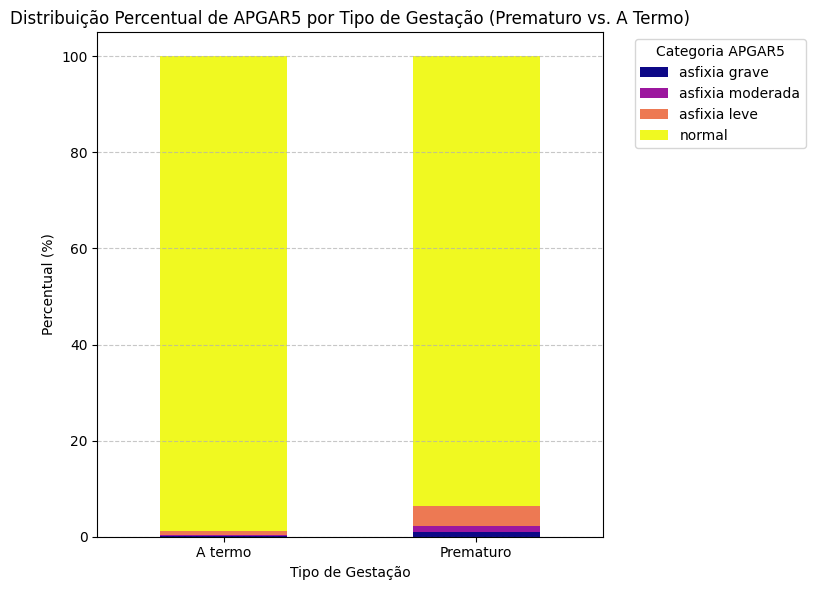

In [9]:
#Definir gestações prematuras e a termo
df['PREMATURO'] = df['GESTACAO'].apply(lambda x: 'Prematuro' if x in ['22 a 27 semanas', '28 a 31 semanas', '32 a 36 semanas'] else 'A termo')

#Criar a tabela cruzada para gestações prematuras e a termo
tabela_cruzada_prematuro = pd.crosstab(df['PREMATURO'], df['APGAR5_CATEGORIA'])

#Calcular os percentuais de linha para a nova tabela cruzada
percentual_prematuro = tabela_cruzada_prematuro.div(tabela_cruzada_prematuro.sum(axis=1), axis=0) * 100

#Criar o gráfico de barras empilhadas
percentual_prematuro.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='plasma')
plt.title('Distribuição Percentual de APGAR5 por Tipo de Gestação (Prematuro vs. A Termo)')
plt.xlabel('Tipo de Gestação')
plt.ylabel('Percentual (%)')
plt.legend(title='Categoria APGAR5', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

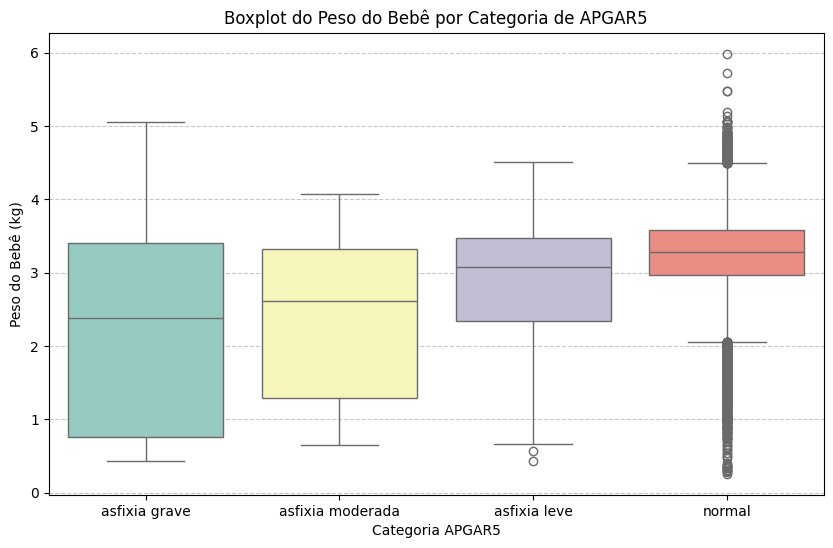

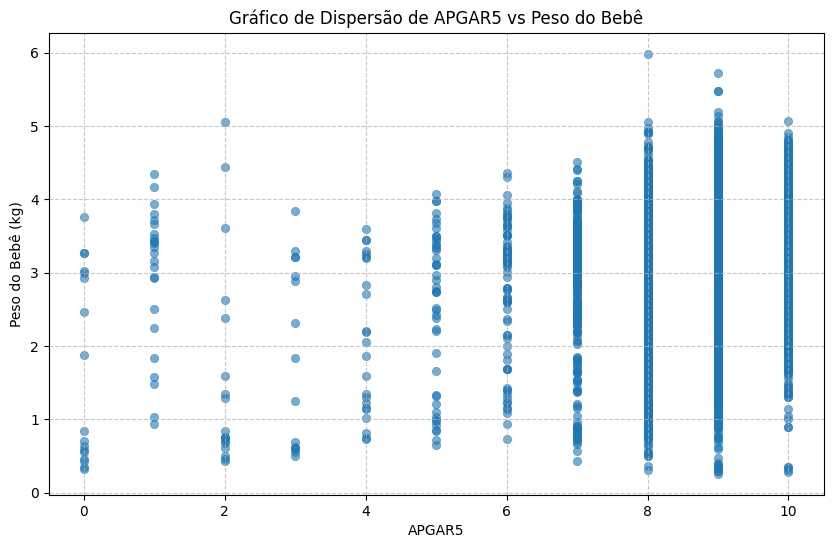

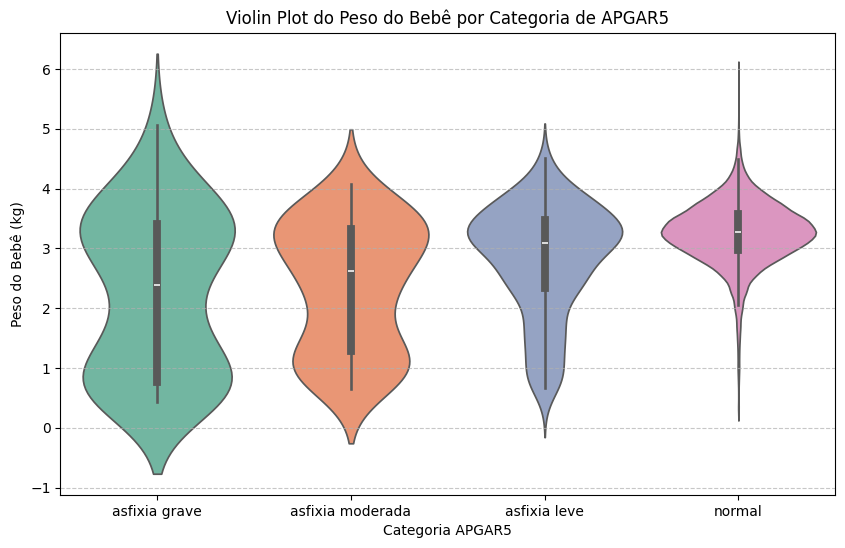

In [11]:
# Convertendo o peso do bebê para quilogramas (dividir por 1000)
df['PESO_KG'] = df['PESO'] / 1000

# Boxplot para mostrar a distribuição do peso do bebê por categoria de APGAR5
plt.figure(figsize=(10, 6))
sns.boxplot(x='APGAR5_CATEGORIA', y='PESO_KG', data=df, hue='APGAR5_CATEGORIA', palette='Set3', legend=False)
plt.title('Boxplot do Peso do Bebê por Categoria de APGAR5')
plt.xlabel('Categoria APGAR5')
plt.ylabel('Peso do Bebê (kg)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Scatter Plot para mostrar a correlação direta entre APGAR5 e peso do bebê
plt.figure(figsize=(10, 6))
sns.scatterplot(x='APGAR5', y='PESO_KG', data=df, alpha=0.6, edgecolor=None)
plt.title('Gráfico de Dispersão de APGAR5 vs Peso do Bebê')
plt.xlabel('APGAR5')
plt.ylabel('Peso do Bebê (kg)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Violin Plot para mostrar a distribuição e densidade do peso do bebê por categoria de APGAR5
plt.figure(figsize=(10, 6))
sns.violinplot(x='APGAR5_CATEGORIA', y='PESO_KG', data=df, hue='APGAR5_CATEGORIA', palette='Set2', legend=False)
plt.title('Violin Plot do Peso do Bebê por Categoria de APGAR5')
plt.xlabel('Categoria APGAR5')
plt.ylabel('Peso do Bebê (kg)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()